In [38]:
# pip install scikit-learn

In [1]:
import os
from sklearn.model_selection import train_test_split

def load_imdb_data(data_dir):
    texts = []
    labels = []

    # 读取正面评论
    pos_dir = os.path.join(data_dir, 'pos')
    for filename in os.listdir(pos_dir):
        with open(os.path.join(pos_dir, filename), 'r', encoding='utf-8') as f:
            texts.append(f.read())
            labels.append(1)  # 正面评论标签为 1

    # 读取负面评论
    neg_dir = os.path.join(data_dir, 'neg')
    for filename in os.listdir(neg_dir):
        with open(os.path.join(neg_dir, filename), 'r', encoding='utf-8') as f:
            texts.append(f.read())
            labels.append(0)  # 负面评论标签为 0

    return texts, labels

# 加载训练集和测试集
train_texts, train_labels = load_imdb_data('../data/aclImdb/train')
test_texts, test_labels = load_imdb_data('../data/aclImdb/test')

# 打印样本
print(f"训练集大小: {len(train_texts)}")
print(f"测试集大小: {len(test_texts)}")
print(f"示例文本: {train_texts[0]}")
print(f"示例标签: {train_labels[0]}")

训练集大小: 25000
测试集大小: 25000
示例文本: Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!
示例标签: 1


In [3]:
# pip install matplotlib

In [4]:
# pip install seaborn

训练集信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None

测试集信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None

训练集标签分布:
label
1    12500
0    12500
Name: count, dtype: int64

测试集标签分布:
label
1    12500
0    12500
Name: count, dtype: int64

训练集文本长度统计:
count    25000.00000
mean      1325.06964
std       1003.13367
min         52.00000
25%        702.00000
50%        979.00000
75%       1614.00000
max      13704.00000
Name: text_length, dtype: float64

测试集文本长度统计:
count    2500

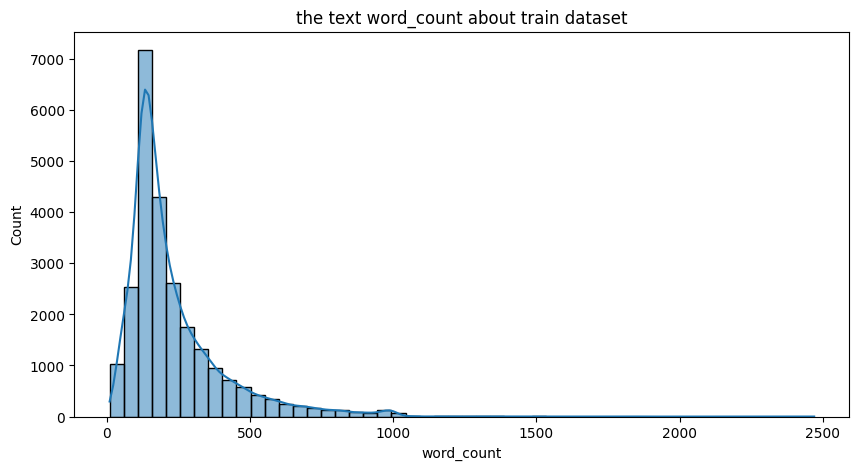

In [5]:
# 对数据进行探索性分析，了解数据的基本特征
import pandas as pd

# 将数据转换为 DataFrame
train_df = pd.DataFrame({'text': train_texts, 'label': train_labels})
test_df = pd.DataFrame({'text': test_texts, 'label': test_labels})

# 查看数据基本信息
print("训练集信息:")
print(train_df.info())
print("\n测试集信息:")
print(test_df.info())

# 查看标签分布
print("\n训练集标签分布:")
print(train_df['label'].value_counts())
print("\n测试集标签分布:")
print(test_df['label'].value_counts())

# 查看文本长度分布
train_df['text_length'] = train_df['text'].apply(len)
test_df['text_length'] = test_df['text'].apply(len)

print("\n训练集文本长度统计:")
print(train_df['text_length'].describe())
print("\n测试集文本长度统计:")
print(test_df['text_length'].describe())

# 统计词数
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))
test_df['word_count'] = test_df['text'].apply(lambda x: len(x.split()))

# 查看词数分布
print("训练集词数统计:")
print(train_df['word_count'].describe())
print("\n测试集词数统计:")
print(test_df['word_count'].describe())

# 可视化文本长度分布
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(train_df['word_count'], bins=50, kde=True)
plt.title("the text word_count about train dataset")
plt.show()

In [6]:
# 根据训练集文本构建词汇表，将文本转换为数值表示。
from collections import Counter

# 构建词汇表
def build_vocab(texts, vocab_size=10000):
    counter = Counter()
    for text in texts:
        counter.update(text.split())
    vocab = {word: idx + 2 for idx, (word, _) in enumerate(counter.most_common(vocab_size))}
    vocab['<PAD>'] = 0  # 填充符
    vocab['<UNK>'] = 1  # 未知词
    return vocab

# 只会编码出现次数最多的10000个词
vocab = build_vocab(train_texts, vocab_size=10000)
print(f"词汇表大小: {len(vocab)}")
print("示例词汇:", list(vocab.items())[:10])

词汇表大小: 10002
示例词汇: [('the', 2), ('a', 3), ('and', 4), ('of', 5), ('to', 6), ('is', 7), ('in', 8), ('I', 9), ('that', 10), ('this', 11)]


In [7]:
# 检查有多少词汇被映射为 <UNK>
def count_unk_words(texts, vocab):
    unk_count = 0
    total_count = 0
    for text in texts:
        for word in text.split():
            total_count += 1
            if word not in vocab:
                unk_count += 1
    return unk_count, total_count

unk_count, total_count = count_unk_words(train_texts, vocab)
print(f"未知词数量: {unk_count}")
print(f"总词数: {total_count}")
print(f"未知词比例: {unk_count / total_count:.2%}")

未知词数量: 802253
总词数: 5844680
未知词比例: 13.73%


In [8]:
# 使用词汇表将文本转换为数值序列
def text_to_sequence(text, vocab):
    return [vocab.get(word, vocab['<UNK>']) for word in text.split()]

# 转换训练集和测试集
train_sequences = [text_to_sequence(text, vocab) for text in train_texts]
test_sequences = [text_to_sequence(text, vocab) for text in test_texts]

print("示例文本:", train_texts[0])
print("转换后的序列:", train_sequences[0])

示例文本: Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!
转换后的序列: [1, 2717, 7, 3, 1398, 1350, 56, 2215, 31, 2, 169, 83, 15, 46, 80, 9006, 42, 518, 776, 138, 15, 1, 359, 7182, 190, 8, 2, 5768, 8850, 493, 84, 6, 263, 10, 1, 1, 2618, 7, 78, 2641, 6

In [9]:
# 将文本序列填充或截断为固定长度，确保输入数据一致性
import numpy as np

def pad_sequences(sequences, max_len, pad_value=0):
    padded = np.full((len(sequences), max_len), pad_value)
    for i, seq in enumerate(sequences):
        if len(seq) > max_len:
            padded[i] = seq[:max_len]  # 截断
        else:
            padded[i, :len(seq)] = seq  # 填充
    return padded

max_len = 300  # 设定最大长度
train_padded = pad_sequences(train_sequences, max_len)
test_padded = pad_sequences(test_sequences, max_len)

print("填充后的序列形状:", train_padded.shape)
print("示例填充序列:", train_padded[0])

填充后的序列形状: (25000, 300)
示例填充序列: [   1 2717    7    3 1398 1350   56 2215   31    2  169   83   15   46
   80 9006   42  518  776  138   15    1  359 7182  190    8    2 5768
 8850  493   84    6  263   10    1    1 2618    7   78 2641    6  897
   70    7    1   19    1    6 2701    1    2 7910 1890   35   64   67
  257  148   55 1703    1    1    2    1    5    2  213 5388   37 2973
   84    5    2 8534    9  635    4   55 9007  283    9  207    2  482
    8   61    3 1831 4548  762    6 4381  215    2 3138    9 1369    1
    1   31    1    1  133  441 7520    1  160  225    6    1   32    5
  117    1    1    1    6    1    1    9  543   10  102 2041    5   66
  877   98   10    1 2717    7  237    1  255    3 3139   10   12    1
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0 

#### 将预处理结果保存，以便后续使用时直接读取

In [10]:
# 将预处理后的数据保存，方便后续使用
import pickle

# 保存词汇表
with open('vocab.pkl', 'wb') as f:
    pickle.dump(vocab, f)

# 保存预处理后的数据
with open('train_data.pkl', 'wb') as f:
    pickle.dump((train_padded, train_labels), f)

with open('test_data.pkl', 'wb') as f:
    pickle.dump((test_padded, test_labels), f)

In [11]:
# 加载预处理后的数据
with open('vocab.pkl', 'rb') as f:
    vocab = pickle.load(f)

with open('train_data.pkl', 'rb') as f:
    train_padded, train_labels = pickle.load(f)

with open('test_data.pkl', 'rb') as f:
    test_padded, test_labels = pickle.load(f)

In [1]:
from torch.utils.data import Dataset, DataLoader
import torch

class IMDBDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return torch.tensor(self.sequences[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

# 创建数据集
train_dataset = IMDBDataset(train_padded, train_labels)
test_dataset = IMDBDataset(test_padded, test_labels)

# 创建 DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 检查一个批次的数据
for batch in train_loader:
    print("输入数据形状:", batch[0].shape)
    print("标签数据形状:", batch[1].shape)
    break

NameError: name 'train_padded' is not defined

In [13]:
import torch.nn as nn

class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_classes):
        super(TextClassifier, self).__init__()
        # nn.Embedding 层的作用是将离散的词汇索引映射到连续的向量空间。
        # 具体来说，nn.Embedding 层将每个词汇索引（通常是一个整数）转换为一个固定维度的向量（embed_dim 维度）
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.rnn = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        embedded = self.embedding(x)  # (batch_size, seq_len, embed_dim)
        _, (hidden, _) = self.rnn(embedded)  # hidden: (1, batch_size, hidden_dim)
        output = self.fc(hidden.squeeze(0))  # (batch_size, num_classes)
        return output

# 初始化模型
vocab_size = 10002  # 词汇表大小
embed_dim = 300  # 词向量维度
hidden_dim = 256  # LSTM 隐藏层维度
num_classes = 2  # 二分类任务
model = TextClassifier(vocab_size, embed_dim, hidden_dim, num_classes)

In [21]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

# 配置优化器
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 定义学习率调度器
"""
mode='max'：监控验证集准确率的最大值。
factor=0.1：每次降低学习率的因子（新学习率 = 当前学习率 * factor）。
patience=2：如果验证集性能在 2 个 epoch 内没有提升，则降低学习率。
"""
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=2)

# 配置损失函数
loss_fn = nn.CrossEntropyLoss()

In [27]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score


def evaluate(model, val_loader, device):
    model.eval()
    model.to(device)

    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in tqdm(val_loader, desc="验证"):
            inputs = batch[0].to(device)
            labels = batch[1].to(device)

            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            predictions.extend(preds)
            true_labels.extend(labels.cpu().numpy())

    # 计算准确率
    accuracy = accuracy_score(true_labels, predictions)
    return accuracy

def train(model, train_loader, optimizer, loss_fn, device, epochs=5):
    model.train()
    model.to(device)

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{epochs}")

        for batch in progress_bar:
            # 将数据移动到设备
            inputs = batch[0].to(device)
            labels = batch[1].to(device)

            # 前向传播
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)

            # 反向传播
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            progress_bar.set_postfix({'loss': loss.item()})

        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch + 1} 平均损失: {avg_loss:.4f}")
        
        # 验证集评估
        val_accuracy = evaluate(model, train_loader, device)
        print(f"验证集准确率: {val_accuracy:.4f}")
        
        # 动态调整学习率
        scheduler.step(val_accuracy)

# 开始训练
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train(model, train_loader, optimizer, loss_fn, device, 20)

Epoch 1/20: 100%|██████████████████████████████████████████████████████| 782/782 [00:12<00:00, 62.05it/s, loss=0.00235]


Epoch 1 平均损失: 0.0391


验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 173.66it/s]


验证集准确率: 0.9938


Epoch 2/20: 100%|██████████████████████████████████████████████████████| 782/782 [00:12<00:00, 63.89it/s, loss=0.00551]


Epoch 2 平均损失: 0.0290


验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 169.57it/s]


验证集准确率: 0.9964


Epoch 3/20: 100%|██████████████████████████████████████████████████████| 782/782 [00:12<00:00, 63.61it/s, loss=0.00547]


Epoch 3 平均损失: 0.0210


验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 173.37it/s]


验证集准确率: 0.9966


Epoch 4/20: 100%|██████████████████████████████████████████████████████| 782/782 [00:12<00:00, 63.57it/s, loss=0.00686]


Epoch 4 平均损失: 0.0227


验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 174.06it/s]


验证集准确率: 0.9964


Epoch 5/20: 100%|████████████████████████████████████████████████████████| 782/782 [00:12<00:00, 63.35it/s, loss=0.076]


Epoch 5 平均损失: 0.0204


验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 174.10it/s]


验证集准确率: 0.9950


Epoch 6/20: 100%|████████████████████████████████████████████████████████| 782/782 [00:12<00:00, 63.28it/s, loss=0.144]


Epoch 6 平均损失: 0.0245


验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 167.54it/s]


验证集准确率: 0.9972


Epoch 7/20: 100%|███████████████████████████████████████████████████████| 782/782 [00:12<00:00, 62.02it/s, loss=0.0116]


Epoch 7 平均损失: 0.0166


验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 164.56it/s]


验证集准确率: 0.9982


Epoch 8/20: 100%|██████████████████████████████████████████████████████| 782/782 [00:12<00:00, 62.01it/s, loss=0.00044]


Epoch 8 平均损失: 0.0156


验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 163.02it/s]


验证集准确率: 0.9975


Epoch 9/20: 100%|██████████████████████████████████████████████████████| 782/782 [00:12<00:00, 62.79it/s, loss=0.00104]


Epoch 9 平均损失: 0.0169


验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 170.04it/s]


验证集准确率: 0.9983


Epoch 10/20: 100%|████████████████████████████████████████████████████| 782/782 [00:12<00:00, 63.64it/s, loss=0.000298]


Epoch 10 平均损失: 0.0185


验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 172.72it/s]


验证集准确率: 0.9979


Epoch 11/20: 100%|████████████████████████████████████████████████████| 782/782 [00:12<00:00, 64.26it/s, loss=0.000229]


Epoch 11 平均损失: 0.0106


验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 175.56it/s]


验证集准确率: 0.9952


Epoch 12/20: 100%|█████████████████████████████████████████████████████| 782/782 [00:12<00:00, 64.19it/s, loss=0.00785]


Epoch 12 平均损失: 0.0136


验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 173.81it/s]


验证集准确率: 0.9979


Epoch 13/20: 100%|██████████████████████████████████████████████████████| 782/782 [00:12<00:00, 64.04it/s, loss=0.0018]


Epoch 13 平均损失: 0.0082


验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 174.45it/s]


验证集准确率: 0.9993


Epoch 14/20: 100%|████████████████████████████████████████████████████| 782/782 [00:12<00:00, 64.68it/s, loss=0.000677]


Epoch 14 平均损失: 0.0041


验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 168.65it/s]


验证集准确率: 0.9994


Epoch 15/20: 100%|████████████████████████████████████████████████████| 782/782 [00:12<00:00, 64.38it/s, loss=0.000502]


Epoch 15 平均损失: 0.0035


验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 175.35it/s]


验证集准确率: 0.9994


Epoch 16/20: 100%|████████████████████████████████████████████████████| 782/782 [00:12<00:00, 64.20it/s, loss=0.000148]


Epoch 16 平均损失: 0.0032


验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 174.46it/s]


验证集准确率: 0.9995


Epoch 17/20: 100%|████████████████████████████████████████████████████| 782/782 [00:12<00:00, 63.75it/s, loss=0.000339]


Epoch 17 平均损失: 0.0029


验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 176.01it/s]


验证集准确率: 0.9995


Epoch 18/20: 100%|████████████████████████████████████████████████████| 782/782 [00:12<00:00, 64.31it/s, loss=0.000861]


Epoch 18 平均损失: 0.0027


验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 174.86it/s]


验证集准确率: 0.9995


Epoch 19/20: 100%|████████████████████████████████████████████████████| 782/782 [00:12<00:00, 64.05it/s, loss=0.000716]


Epoch 19 平均损失: 0.0024


验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 174.19it/s]


验证集准确率: 0.9996


Epoch 20/20: 100%|█████████████████████████████████████████████████████| 782/782 [00:12<00:00, 63.88it/s, loss=8.52e-5]


Epoch 20 平均损失: 0.0022


验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 174.38it/s]

验证集准确率: 0.9996


In [28]:
# 验证模型
evaluate(model, test_loader, device)

验证: 100%|█████████████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 167.77it/s]


0.83128

In [29]:
torch.save(model.state_dict(), 'text_classifier_model.pth')

In [30]:
# 示例推理
def predict_onetext(text, model, vocab, device, max_len=128):
    # 将文本转换为数值序列
    tokens = text.split()  # 按空格分词
    sequence = [vocab.get(token, vocab['<UNK>']) for token in tokens]  # 将词转换为索引
    sequence = sequence[:max_len] + [vocab['<PAD>']] * (max_len - len(sequence))  # 填充或截断
    sequence = torch.tensor(sequence, dtype=torch.long).unsqueeze(0).to(device)  # 转换为张量并添加批次维度

    # 推理
    model.eval()
    with torch.no_grad():
        output = model(sequence)
        pred = torch.argmax(output, dim=1).item()

    return '正面' if pred == 1 else '负面'

# 测试推理
text = "This movie was fantastic! I loved every minute of it."
print(f"预测结果: {predict(text, model, vocab, device)}")

预测结果: 正面


In [31]:
# 测试集上预测
def predict(model, test_loader, device):
    model.eval()
    model.to(device)

    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="测试集预测"):
            inputs = batch[0].to(device)
            labels = batch[1].to(device)

            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            predictions.extend(preds)
            true_labels.extend(labels.cpu().numpy())

    return predictions, true_labels

# 在测试集上进行预测
test_predictions, test_true_labels = predict(model, test_loader, device)

测试集预测: 100%|███████████████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 164.10it/s]


#### 计算性能指标
使用 sklearn 计算模型的性能指标，如准确率、精确率、召回率和 F1 分数

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 计算性能指标
accuracy = accuracy_score(test_true_labels, test_predictions)
precision = precision_score(test_true_labels, test_predictions, average='binary')
recall = recall_score(test_true_labels, test_predictions, average='binary')
f1 = f1_score(test_true_labels, test_predictions, average='binary')

print(f"测试集准确率: {accuracy:.4f}")
print(f"测试集精确率: {precision:.4f}")
print(f"测试集召回率: {recall:.4f}")
print(f"测试集 F1 分数: {f1:.4f}")

测试集准确率: 0.8313
测试集精确率: 0.8342
测试集召回率: 0.8270
测试集 F1 分数: 0.8305


#### 绘制混淆矩阵
使用混淆矩阵可视化模型的分类性能

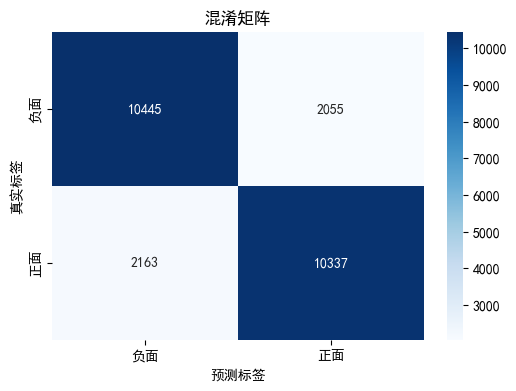

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置 matplotlib 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用 SimHei 字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算混淆矩阵
cm = confusion_matrix(test_true_labels, test_predictions)

# 绘制混淆矩阵
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['负面', '正面'], yticklabels=['负面', '正面'])
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵')
plt.show()

#### 分析模型的鲁棒性
鲁棒性是指模型在面对噪声、数据分布变化等情况时的稳定性。以下是一些分析鲁棒性的方法：

​噪声测试：在测试集中加入噪声（如随机替换词），观察模型性能的变化。
​跨数据集测试：在其他类似数据集上测试模型的性能。
​类别不平衡测试：调整测试集中正负样本的比例，观察模型性能的变化。

In [35]:
def add_noise(texts, noise_level=0.1):
    noisy_texts = []
    for text in texts:
        words = text.split()
        for i in range(len(words)):
            if torch.rand(1).item() < noise_level:
                words[i] = '<UNK>'  # 用未知词替换
        noisy_texts.append(' '.join(words))
    return noisy_texts

# 在测试集中加入噪声
noisy_test_texts = add_noise(test_texts, noise_level=0.1)

# 预处理噪声测试集
noisy_test_sequences = [text_to_sequence(text, vocab) for text in noisy_test_texts]
noisy_test_padded = pad_sequences(noisy_test_sequences, max_len=128)

# 创建噪声测试集 DataLoader
noisy_test_dataset = IMDBDataset(noisy_test_padded, test_labels)
noisy_test_loader = DataLoader(noisy_test_dataset, batch_size=32, shuffle=False)

# 在噪声测试集上进行预测
noisy_test_predictions, noisy_test_true_labels = predict(model, noisy_test_loader, device)

# 计算噪声测试集的性能指标
noisy_accuracy = accuracy_score(noisy_test_true_labels, noisy_test_predictions)
print(f"噪声测试集准确率: {noisy_accuracy:.4f}")

测试集预测: 100%|███████████████████████████████████████████████████████████████████| 782/782 [00:02<00:00, 321.66it/s]

噪声测试集准确率: 0.7628
